 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [49]:
df = pd.read_excel('Datasets/aquaattributes.xlsx')

In [50]:
df.head(20)

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.10,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.30,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.20,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.20,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.20,0.5,213,1072.0,yes
5,1550,U/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,117,0.20,0.5,100,722.0,yes
6,1006,BEAS AT D/S MANDI,31.708165,76.931367,Shimla,HIMACHAL PRADESH,16.0,9.0,8.0,155,0.50,0.7,445,1855.0,yes
7,2604,BEAS AT D/S JAISINGHPUR,31.899643,76.597945,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,211,0.50,0.5,7,72.0,yes
8,1007,BEAS AT D/S ALAMPUR,15.884349,78.119382,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,202,0.60,0.4,9,123.0,yes
9,1008,BEAS AT D/S DEHRAGOPIPUR,31.881756,76.214645,Shimla,HIMACHAL PRADESH,19.0,8.0,8.0,280,0.70,1.1,10,157.0,yes


In [53]:
df["Capitalcity"].unique()

array(['Shimla', 'Chandigarh', 'Jammu', 'Dehradun', 'Lucknow', 'Patna',
       'Kolkata', 'New Delhi', 'Bhopal', 'Jaipur', 'Ranchi', 'Dispur',
       'Kohima', 'Gangtok', 'Gandhinagar', 'Mumbai', 'Raipur',
       'Bhubaneswar', 'Hyderabad', 'Bengaluru', 'Chennai',
       'Thiruvananthapuram', 'Pondicherry', 'Panaji', 'Telangana',
       'Bangalore', 'Daman', 'Silvassa', 'Imphal', 'Agartala', 'Shillong'],
      dtype=object)

In [54]:
df["Capitalcity"].nunique()

31

In [45]:
df.shape

(967, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    1361 non-null   int64  
 1   Locations      1361 non-null   object 
 2   Lat            1294 non-null   float64
 3   Lon            1294 non-null   float64
 4   Capitalcity    1361 non-null   object 
 5   State          1360 non-null   object 
 6   Temperature    1327 non-null   float64
 7   D.O            1352 non-null   float64
 8   pH             1360 non-null   float64
 9   Conductivity   1324 non-null   object 
 10  B.O.D          1293 non-null   float64
 11  Nitrate        1152 non-null   object 
 12  Fecalcaliform  1173 non-null   object 
 13  Totalcaliform  1226 non-null   float64
 14  class          1361 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 159.6+ KB


In [5]:
df.isnull().sum()

Stationcode        0
Locations          0
Lat               67
Lon               67
Capitalcity        0
State              1
Temperature       34
D.O                9
pH                 1
Conductivity      37
B.O.D             68
Nitrate          209
Fecalcaliform    188
Totalcaliform    135
class              0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Stationcode      0
Locations        0
Lat              0
Lon              0
Capitalcity      0
State            0
Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    object 
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    object 
 12  Fecalcaliform  967 non-null    object 
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 120.9+ KB


In [13]:
cndt = df['Conductivity']

In [14]:
[x for x in cndt.apply(type).unique()]

[int, float]

In [15]:
df['Conductivity'] = df['Conductivity'].astype(float)

In [16]:
nitr = df['Nitrate']

In [17]:
[x for x in nitr.apply(type).unique()]

[float, int]

In [18]:
df['Nitrate'] = df['Nitrate'].astype(float)

In [19]:
fclf = df['Fecalcaliform']

In [20]:
[x for x in fclf.apply(type).unique()]

[int, float]

In [21]:
df['Fecalcaliform'] = df['Fecalcaliform'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stationcode    967 non-null    int64  
 1   Locations      967 non-null    object 
 2   Lat            967 non-null    float64
 3   Lon            967 non-null    float64
 4   Capitalcity    967 non-null    object 
 5   State          967 non-null    object 
 6   Temperature    967 non-null    float64
 7   D.O            967 non-null    float64
 8   pH             967 non-null    float64
 9   Conductivity   967 non-null    float64
 10  B.O.D          967 non-null    float64
 11  Nitrate        967 non-null    float64
 12  Fecalcaliform  967 non-null    float64
 13  Totalcaliform  967 non-null    float64
 14  class          967 non-null    object 
dtypes: float64(10), int64(1), object(4)
memory usage: 120.9+ KB


In [23]:
df.describe()

,Stationcode,Lat,Lon,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,9.670000e+02
mean,1899.374354,20.970569,78.364700,25.355714,6.891423,7.668664,1323.534458,3.738066,5.075913,1.773840e+05,5.361407e+05
std,706.222881,6.459671,6.894196,4.413136,1.674220,0.478087,3703.988886,8.546417,30.069937,3.792506e+06,1.015845e+07
min,4.000000,8.388518,19.633621,5.000000,0.000000,5.200000,25.250000,0.000000,0.000000,1.400000e+00,5.000000e-03
25%,1326.500000,17.000538,74.970558,24.000000,6.200000,7.450000,201.500000,1.021250,0.304167,1.579167e+01,5.000000e+01
50%,1960.000000,21.007658,76.852727,26.458333,7.091667,7.788333,388.000000,2.091667,0.800000,1.441667e+02,4.650000e+02
75%,2515.500000,26.234941,80.964831,27.908333,7.750000,8.000000,754.333333,3.936667,2.000000,8.245833e+02,1.746665e+03
max,3029.000000,47.351943,95.999123,37.500000,30.366667,9.575000,36593.000000,158.750000,640.000000,1.100000e+08,2.500000e+08


In [27]:
df_new = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Fecalcaliform','Totalcaliform','class']]

In [28]:
df_new['class'] = df_new['class'] == 'yes'

In [29]:
df_new.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,True
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,True
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,True
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,True
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,True


In [34]:
df_new['class'].sum()

751

In [38]:
df_new[df_new['class'] == False].shape[0]

216

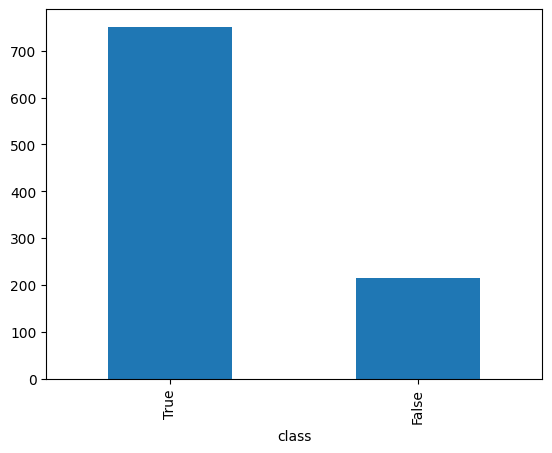

In [42]:
df_new['class'].value_counts().plot(kind='bar')
plt.show()

In [39]:
df_dist = df_new.copy()

In [ ]:
df_dist.loc[df_dist['class'] == True]

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 1360
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    967 non-null    float64
 1   D.O            967 non-null    float64
 2   pH             967 non-null    float64
 3   Conductivity   967 non-null    float64
 4   B.O.D          967 non-null    float64
 5   Nitrate        967 non-null    float64
 6   Fecalcaliform  967 non-null    float64
 7   Totalcaliform  967 non-null    float64
 8   class          967 non-null    bool   
dtypes: bool(1), float64(8)
memory usage: 68.9 KB


In [24]:
df_new.corr()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
Temperature,1.000000,-0.137697,-0.062000,0.132268,0.059620,0.026301,-0.013133,-0.013379,-0.162458
D.O,-0.137697,1.000000,0.194636,-0.092865,-0.280783,0.011558,-0.165299,-0.182276,-0.147469
pH,-0.062000,0.194636,1.000000,-0.008232,-0.004717,-0.147210,0.008265,0.009426,-0.298328
Conductivity,0.132268,-0.092865,-0.008232,1.000000,0.164644,-0.008017,-0.003694,-0.003406,0.069188
B.O.D,0.059620,-0.280783,-0.004717,0.164644,1.000000,0.004074,0.053959,0.063619,0.047831
Nitrate,0.026301,0.011558,-0.147210,-0.008017,0.004074,1.000000,-0.005780,-0.006528,0.005181
Fecalcaliform,-0.013133,-0.165299,0.008265,-0.003694,0.053959,-0.005780,1.000000,0.848463,0.024510
Totalcaliform,-0.013379,-0.182276,0.009426,-0.003406,0.063619,-0.006528,0.848463,1.000000,0.027741
class,-0.162458,-0.147469,-0.298328,0.069188,0.047831,0.005181,0.024510,0.027741,1.000000


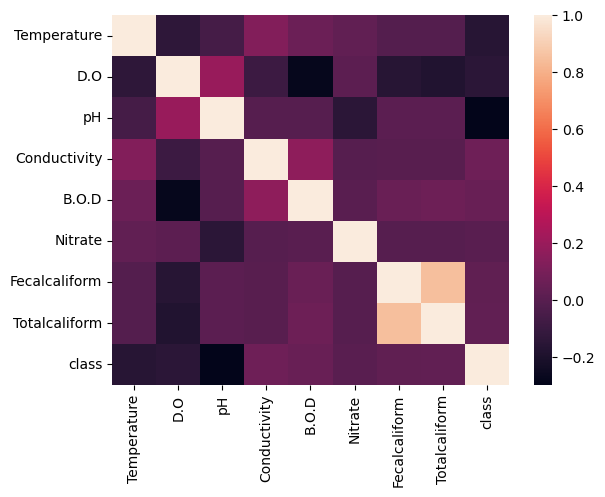

In [25]:
sns.heatmap(df_new.corr());

In [26]:
X = df.loc[:,['Temperature','D.O','pH','Conductivity','B.O.D','Nitrate','Totalcaliform']]

In [27]:
X.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Totalcaliform
0,9.0,9.0,8.0,85.0,0.1,0.2,397.0
1,10.0,9.0,8.0,102.0,0.3,0.4,954.0
2,11.0,9.0,8.0,96.0,0.2,0.3,653.0
3,13.0,9.0,8.0,94.0,0.2,0.4,317.0
4,14.0,10.0,8.0,112.0,0.2,0.5,1072.0


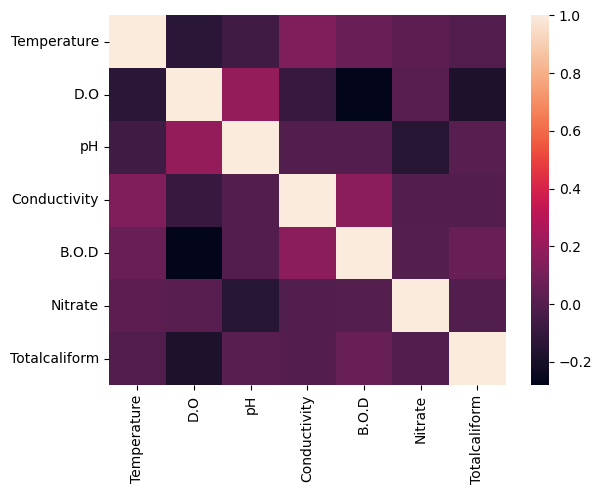

In [28]:
sns.heatmap(X.corr());

In [29]:
[x for x in df['class'].apply(type).unique()]

[str]

In [30]:
df_new['class'].unique()

array([ True, False])

In [31]:
y = df_new['class'] == 'yes'

In [32]:
y.value_counts()

False    967
Name: class, dtype: int64

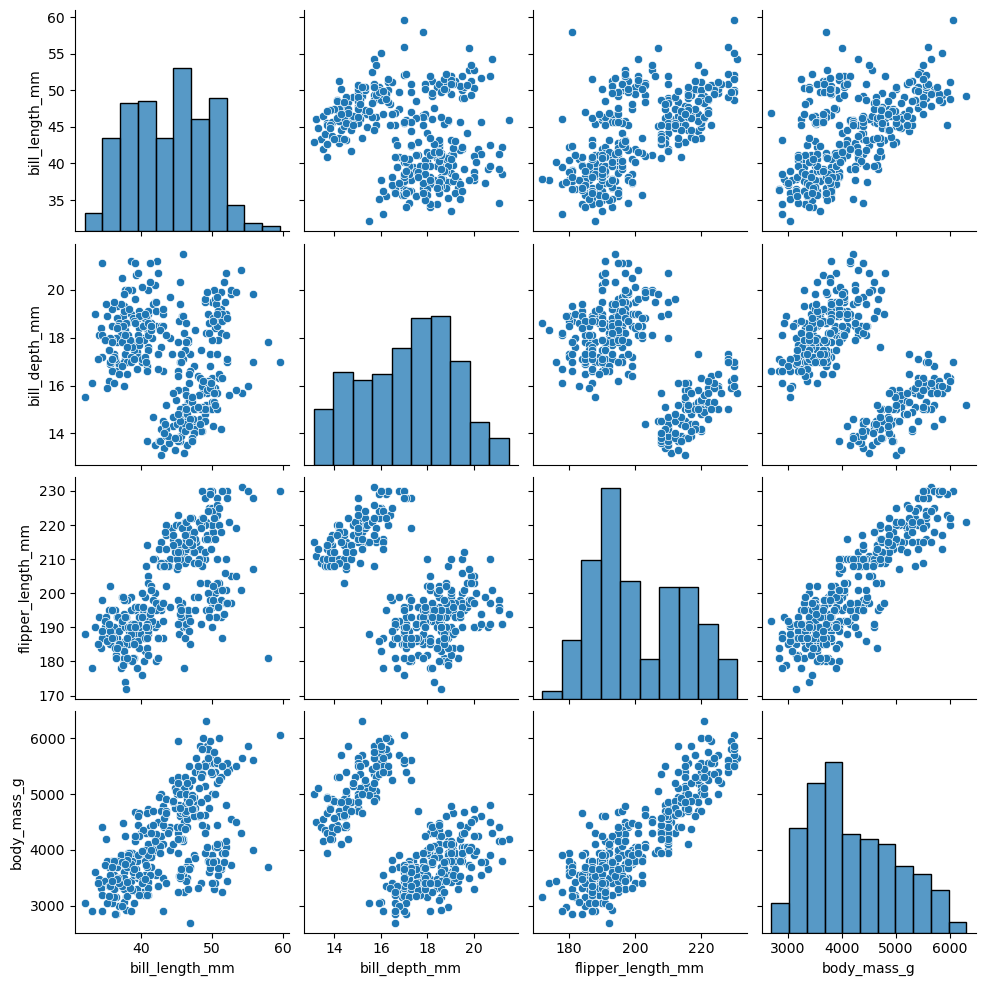

In [33]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

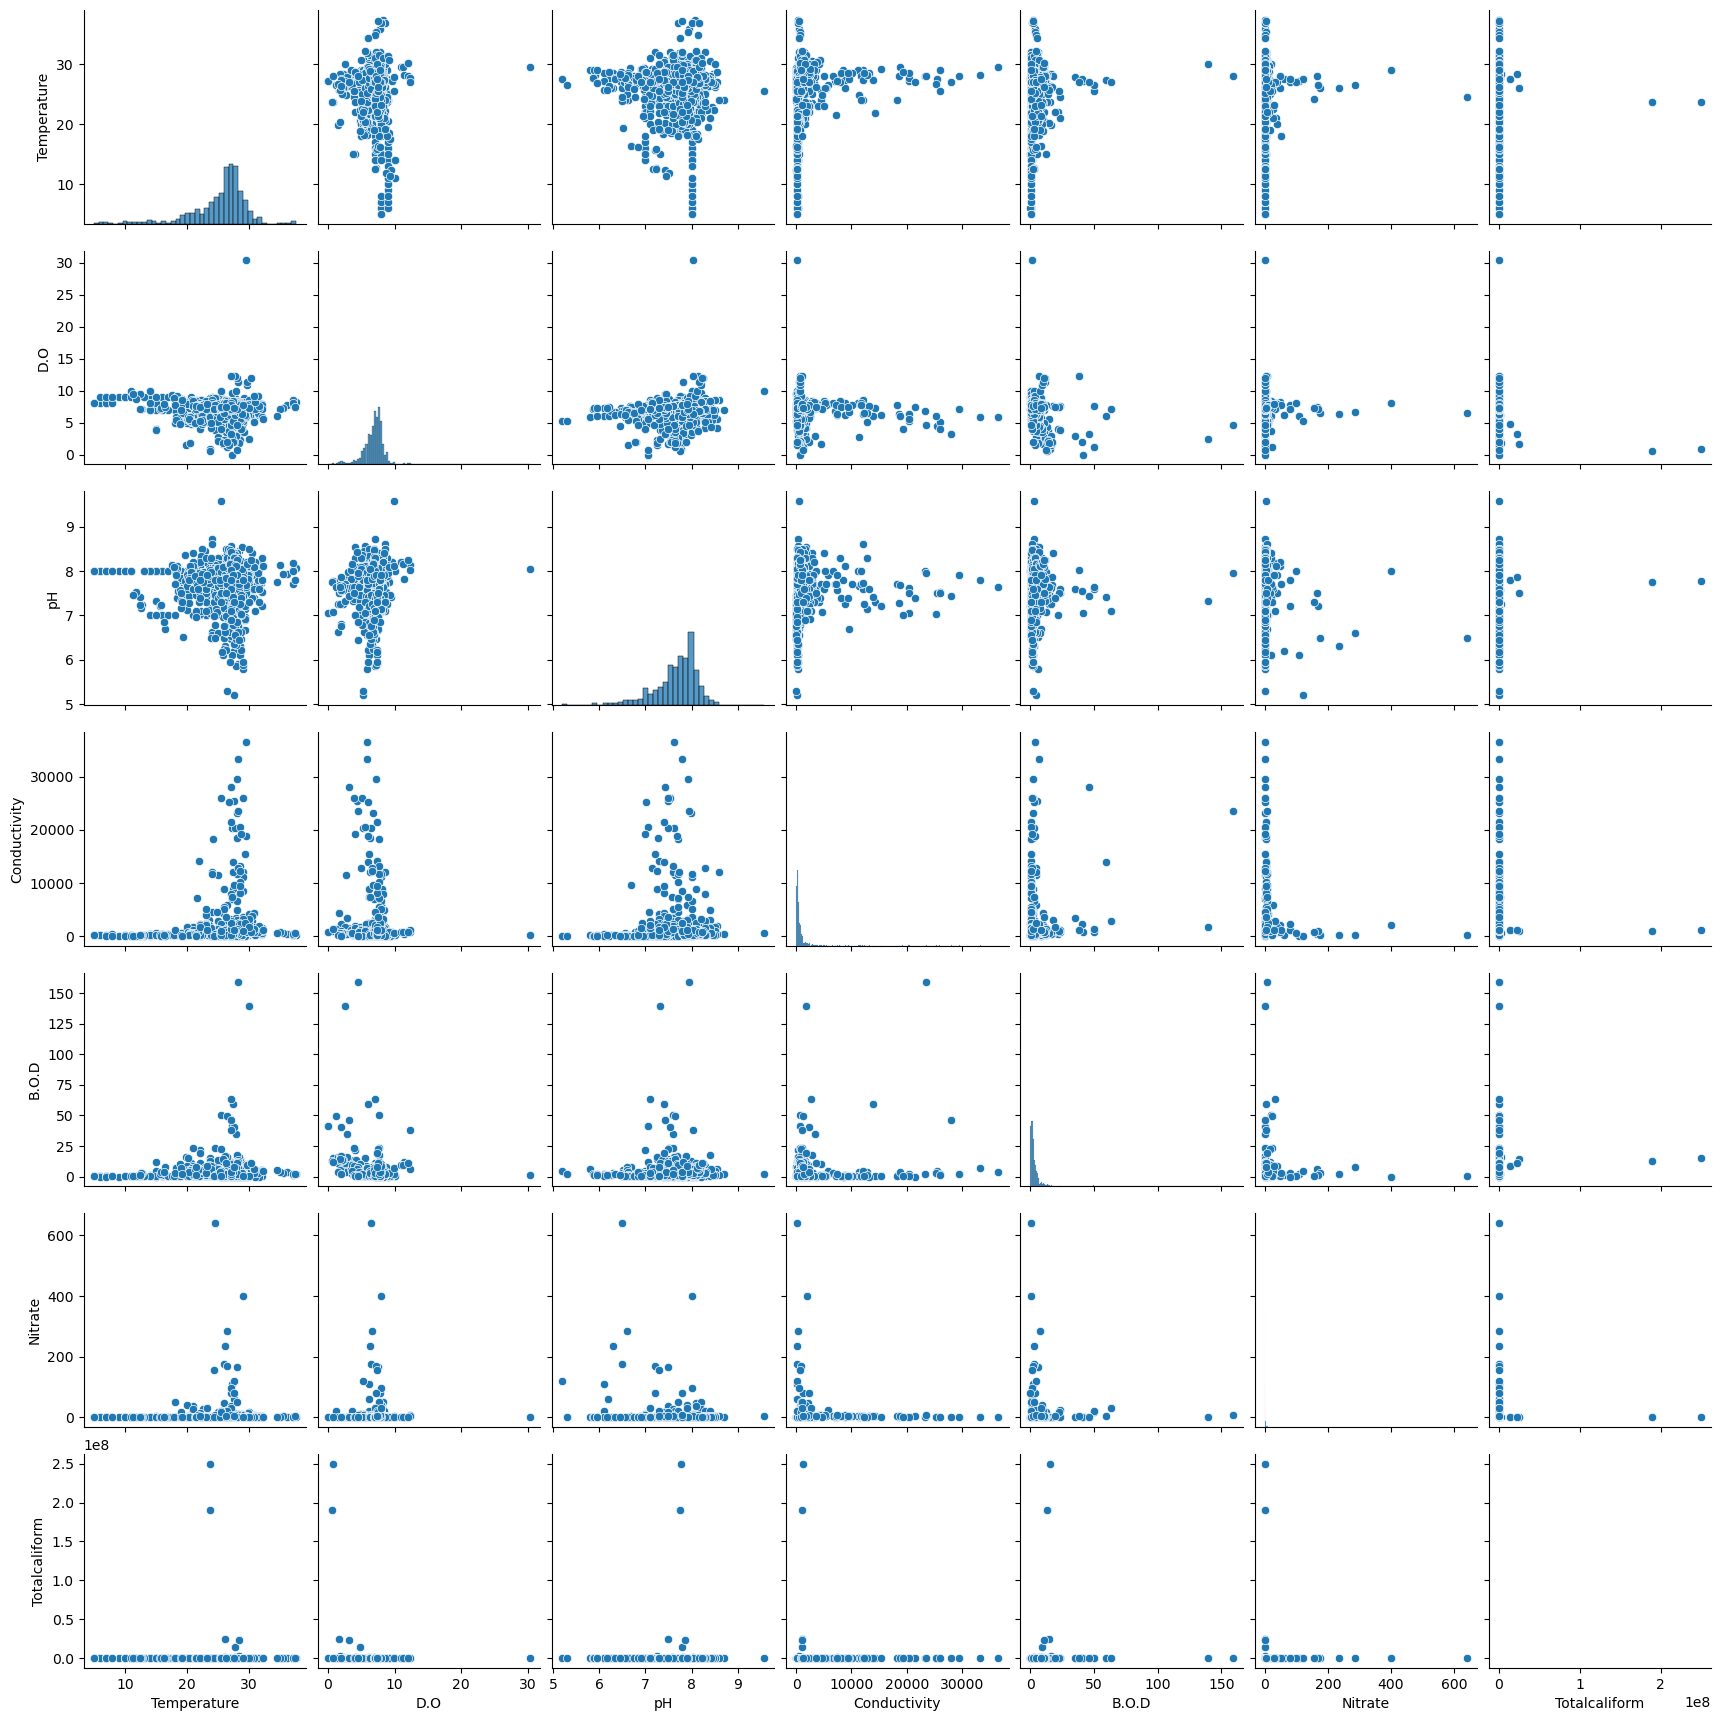

In [34]:
sns.pairplot(X)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
smt = SMOTE(sampling_strategy='minority',random_state=123)
X_res, y_res = smt.fit_resample(X_train,y_train)

In [102]:
X_res.shape

(1052, 7)

In [103]:
y_res.shape

(1052,)

In [104]:
y_res.value_counts()

True     526
False    526
Name: class, dtype: int64

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
X_scaled_orig = StandardScaler().fit_transform(X)

In [107]:
pca = PCA(3)
projected_orig = pca.fit_transform(X_scaled_orig)

C:\Users\USER\AppData\Local\Temp\ipykernel_6188\1677698848.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=y,cmap=plt.cm.get_cmap('Spectral',2))


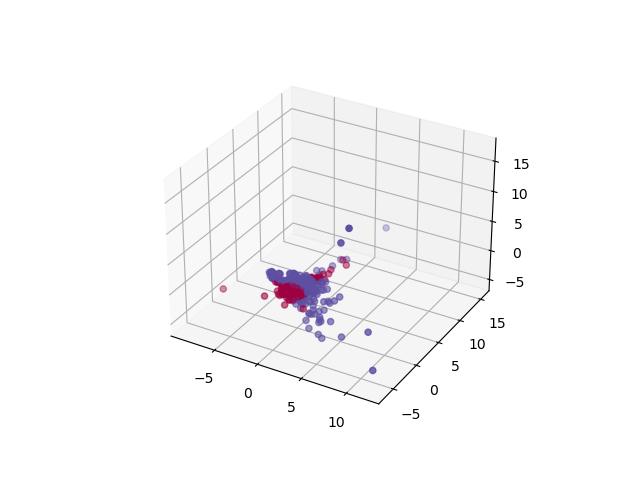

In [108]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(projected_orig[:,0],projected_orig[:,1],projected_orig[:,2],
            c=y,cmap=plt.cm.get_cmap('Spectral',2))

plt.show()

In [109]:
X_scaled = StandardScaler().fit_transform(X_res)

In [110]:
pca = PCA(3)
projected = pca.fit_transform(X_scaled)

C:\Users\USER\AppData\Local\Temp\ipykernel_6188\3829397397.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=y_res,cmap=plt.cm.get_cmap('Spectral',2))


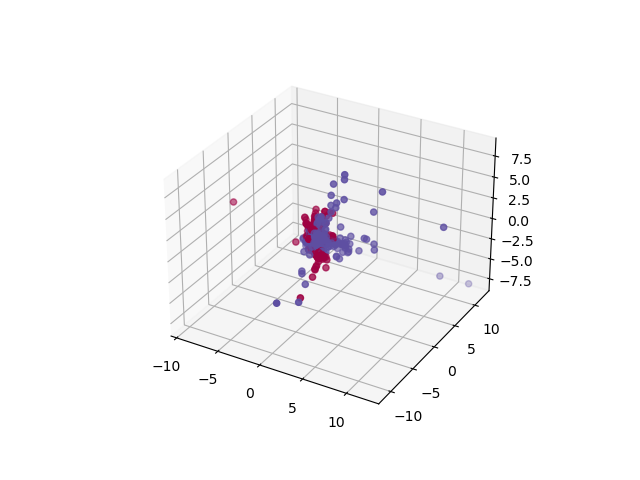

In [111]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(projected[:,0],projected[:,1],projected[:,2],
            c=y_res,cmap=plt.cm.get_cmap('Spectral',2))

plt.show()

In [112]:
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error as MSE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
import joblib

In [113]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [114]:
lin_model = LogisticRegression().fit(X_train_scaled,y_train)

In [115]:
y_pred = lin_model.predict(scaler.transform(X_test))
y_train_pred = lin_model.predict(X_train_scaled)

In [116]:
accuracy_score(y_test,y_pred)

0.8109965635738832

In [117]:
f1_score(y_test,y_pred)

0.8902195608782435

In [118]:
accuracy_score(y_train,y_train_pred)

0.8002958579881657

In [119]:
f1_score(y_train,y_train_pred)

0.8851063829787233

###### Feature Engineering

In [42]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

In [43]:
X_scaled_full = StandardScaler().fit_transform(X)

In [44]:
degree = np.arange(1,7)

In [45]:
train_score, val_score = validation_curve(PolynomialRegression(max_iter=100000),
                                          X_scaled_full,y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,cv=5)

C:\Users\USER\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
fig = plt.figure();
ax = fig.add_subplot();

ax.plot(degree,np.median(train_score,1),'b',label='training score');
ax.plot(degree,np.median(val_score,1),'r',label='validation score');
ax.legend();

In [ ]:
np.median(train_score,1)

In [ ]:
np.median(val_score,1)

##### Using Polynomial Feature of order 4

In [ ]:
transform = PolynomialFeatures(4)
X_train_poly = transform.fit_transform(X_train)

In [ ]:
scaler_poly = StandardScaler().fit(X_train_poly)
X_train_final = scaler_poly.transform(X_train_poly)

In [ ]:
model = LogisticRegression(max_iter=100000).fit(X_train_final,y_train)

In [ ]:
X_test_poly = transform.fit_transform(X_test)
y_final_pred = model.predict(scaler_poly.transform(X_test_poly))

In [ ]:
y_train_final_pred = model.predict(X_train_final)

In [ ]:
accuracy_score(y_test,y_final_pred)

In [ ]:
accuracy_score(y_train,y_train_final_pred)